# Sentiment analysis 

## Sentiment analysis is a technique used to determine the emotional tone or sentiment expressed in a text. It involves analyzing the words and phrases used in the text to identify the underlying sentiment, whether it is positive, negative, or neutral.

### Sentiment analysis has a wide range of applications, including social media monitoring, customer feedback analysis, and market research.

#### * Lexicon-based analysis is a straightforward approach to sentiment analysis, but it may not be as accurate as more complex methods.
#### * Machine learning-based approaches can be more accurate, but they require labeled training data and may be more computationally expensive.
#### *Pre-trained transformer-based deep learning approaches can achieve state-of-the-art accuracy but require significant computational resources and may not be practical for all use cases.


# Step 1 : Elementary data anlysis (EDA)

In [1]:
#package required for load data and handling missing values
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import pickle


In [2]:
#Read data
data = pd.read_csv(r"C:\Users\PRJAWAL\OneDrive\Desktop\Sentiment-Analysis\reviews.csv")
data.head()

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5.0
1,NEW laptop is great,so far I am loving the new look and the feel o...,5.0
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5.0
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5.0
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5.0


In [3]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     325 non-null    object 
 1   reviewBody   325 non-null    object 
 2   ratingValue  319 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.7+ KB


#### By the data.info , we can conclude that there is 6 values missing from the rating value

In [4]:
#to get unique review
unique_values = data['reviewBody'].unique()
print(unique_values)

['Super light and efficient laptop.  Crisp & clean screen and easier to handle. Very fast execution of apps and programs'
 'so far I am loving the new look and the feel of the new laptop'
 'Great build quality \\ excellent screen \\ very good port options. Keyboard if quality and comfortable to type on the trackpad feels responsive and accurate. The weight of this laptop is outstanding perfect for the daily work commute.'
 'Excellent laptop for work. Processor was able to handle my workload better than my current laptop.'
 'So far so good, I like it has an HDMI, USB-C & A ports instead of all USB-C ports. The power adapter is lighter than I was expecting. laptop is a good size and weight. Screen image looks sharp. Will be using it for work/travel I think it will work out great.'
 'Very light weight and like the touch of the keyboard'
 'Really like the laptop, it is light and fast.'
 'An excellent all-around package. A great size, nice design and well built. Our staff has been very happ

In [5]:
#Drop duplicate rows based on all columns
data = data.drop_duplicates()

# Display the DataFrame without duplicates
print("\nDataFrame without duplicates:")
print(data)


DataFrame without duplicates:
                                              headline  \
0                     Super light and efficient laptop   
1                                  NEW laptop is great   
2                              Lightweight powerhouse.   
3                                Great Laptop for Work   
4                               Practical Solid Laptop   
..                                                 ...   
301                                    Dead on arrival   
302                                        Bad Quality   
303                Hassles with installation of Win 11   
304                                      Broken Device   
319  Dell Latitude 7440 Ultralight Review: A solid ...   

                                            reviewBody  ratingValue  
0    Super light and efficient laptop.  Crisp & cle...          5.0  
1    so far I am loving the new look and the feel o...          5.0  
2    Great build quality \ excellent screen \ very ...        

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 319
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   headline     306 non-null    object 
 1   reviewBody   306 non-null    object 
 2   ratingValue  305 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


#### After droping the duplicate values , the number of rows reduced to 306 from 325 and only one value is missing from the ratingValue

In [7]:
data.isnull().sum()

headline       0
reviewBody     0
ratingValue    1
dtype: int64

# Handling missing values


In [8]:
# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=3)
data_knn = data.copy()
data_knn['ratingValue'] = knn_imputer.fit_transform(data_knn[['ratingValue']])
print(data_knn)

                                              headline  \
0                     Super light and efficient laptop   
1                                  NEW laptop is great   
2                              Lightweight powerhouse.   
3                                Great Laptop for Work   
4                               Practical Solid Laptop   
..                                                 ...   
301                                    Dead on arrival   
302                                        Bad Quality   
303                Hassles with installation of Win 11   
304                                      Broken Device   
319  Dell Latitude 7440 Ultralight Review: A solid ...   

                                            reviewBody  ratingValue  
0    Super light and efficient laptop.  Crisp & cle...      5.00000  
1    so far I am loving the new look and the feel o...      5.00000  
2    Great build quality \ excellent screen \ very ...      5.00000  
3    Excellent laptop f

In [9]:
data_knn.isnull().sum()

headline       0
reviewBody     0
ratingValue    0
dtype: int64

# Text - Prepocessing

### Text preprocessing is a crucial step in performing sentiment analysis, as it helps to clean and normalize the text data, making it easier to analyze. The preprocessing step involves a series of techniques that help transform raw text data into a form you can use for analysis. Some common text preprocessing techniques include tokenization, stop word removal, stemming, and lemmatization.

#### Tokenization is a text preprocessing step in sentiment analysis that involves breaking down the text into individual words or tokens. This is an essential step in analyzing text data as it helps to separate individual words from the raw text, making it easier to analyze and understand

#### Stop word removal is a crucial text preprocessing step in sentiment analysis that involves removing common and irrelevant words that are unlikely to convey much sentiment. Stop words are words that are very common in a language and do not carry much meaning, such as "and," "the," "of," and "it." These words can cause noise and skew the analysis if they are not removed.

#### Stemming and lemmatization are techniques used to reduce words to their root forms. Stemming involves removing the suffixes from words, such as "ing" or "ed," to reduce them to their base form. For example, the word "jumping" would be stemmed to "jump."

#### Lemmatization, however, involves reducing words to their base form based on their part of speech. For example, the word "jumped" would be lemmatized to "jump," but the word "jumping" would be lemmatized to "jumping" since it is a present participle.


In [10]:
!pip install wordcloud

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string
from wordcloud import WordCloud, STOPWORDS

In [12]:
import nltk

In [13]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

# 
final_stopwords.add("one")
print(final_stopwords)

{'whom', 'did', 'me', "it's", "should've", 'was', 'one', 'your', 'the', 'because', 'couldn', 'when', 'against', 'weren', 'aren', 'were', 'have', 'mustn', 'for', 'which', 'hadn', 'before', 'further', 'after', 'this', 'be', 'at', 'down', 'am', 'some', 'by', 'ourselves', 'needn', 'being', "that'll", 'them', 'my', 'too', 'over', 've', 'themselves', "she's", 'isn', 'as', 'theirs', 'above', "you've", 'with', 'through', 'while', 'under', 'more', 'its', 'doing', 're', 'so', 'don', 'both', 'y', 'had', 'who', 'their', 'doesn', 'than', 'his', 'he', 'her', 'to', 'how', 'during', 't', 'didn', 'yourselves', 'of', 'o', 'or', 'here', 'that', 'once', 'i', 'an', "you'll", 'can', 'very', 'same', 'won', 'are', 'if', 'should', 'myself', 'wasn', 'does', 'most', 'all', 'there', 'few', 'is', 'ours', 'shan', 'about', 'yourself', 'but', 'hasn', 'these', 'below', 'mightn', "you're", 'she', 'ma', 'yours', 'a', 'each', 'between', 'been', 'wouldn', 'shouldn', 's', 'from', 'having', 'until', 'why', 'do', "you'd", 'h

In [15]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------


def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)
    
    # remove digits
    review = review.translate(remove_digits)
    
    # lower case all letters
    review = review.lower()
    
    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]
    
    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

# Apply preprocessing to reviewBody column
if 'reviewBody' in data_knn.columns:  # Check if 'reviewBody' column exists
    data_knn['reviewBody'] = data_knn['reviewBody'].apply(preprocessor)

print(data_knn['reviewBody'])

0      super light effici laptop crisp clean screen e...
1                      far love new look feel new laptop
2      great build qualiti excel screen good port opt...
3      excel laptop work processor abl handl workload...
4      far good like hdmi usbc port instead usbc port...
                             ...                        
301                  laptop dead arriv still wait replac
302              bad qualiti overh keyboardtrackpad issu
303    laptop not come requir secur softwar requir co...
304                laptop broken custom support not help
319    dell latitud ultralight impress sleek design p...
Name: reviewBody, Length: 306, dtype: object


In [16]:
from textblob import TextBlob

def analyze_sentiment(reviewbody):
    analysis = TextBlob(reviewbody)
    # Classify the polarity of the review (-1 to 1)
    return analysis.sentiment.polarity

# Apply sentiment analysis function to each review in 'reviewBody' column
data_knn['sentiment_score'] = data_knn['reviewBody'].apply(analyze_sentiment)

# Classify sentiment based on sentiment score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data_knn['sentiment'] = data_knn['sentiment_score'].apply(classify_sentiment)
data_knn['sentiment']

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
301    Negative
302    Negative
303     Neutral
304    Negative
319     Neutral
Name: sentiment, Length: 306, dtype: object

In [17]:
# how many words are in the sentence?
data_knn['word_count'] = data_knn['reviewBody'].str.split().apply(len)
data_knn['word_count'].head(10) 

0    13
1     7
2    23
3    10
4    26
5     5
6     5
7    13
8    26
9    10
Name: word_count, dtype: int64

In [18]:
data_knn.head(306)

,headline,reviewBody,ratingValue,sentiment_score,sentiment,word_count
0,Super light and efficient laptop,super light effici laptop crisp clean screen e...,5.00000,0.310000,Positive,13
1,NEW laptop is great,far love new look feel new laptop,5.00000,0.218182,Positive,7
2,Lightweight powerhouse.,great build qualiti excel screen good port opt...,5.00000,0.833333,Positive,23
3,Great Laptop for Work,excel laptop work processor abl handl workload...,5.00000,0.250000,Positive,10
4,Practical Solid Laptop,far good like hdmi usbc port instead usbc port...,5.00000,0.435000,Positive,26
...,...,...,...,...,...,...
301,Dead on arrival,laptop dead arriv still wait replac,1.00000,-0.200000,Negative,6
302,Bad Quality,bad qualiti overh keyboardtrackpad issu,1.00000,-0.700000,Negative,5
303,Hassles with installation of Win 11,laptop not come requir secur softwar requir co...,1.00000,0.000000,Neutral,8
304,Broken Device,laptop broken custom support not help,1.00000,-0.400000,Negative,6


In [19]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

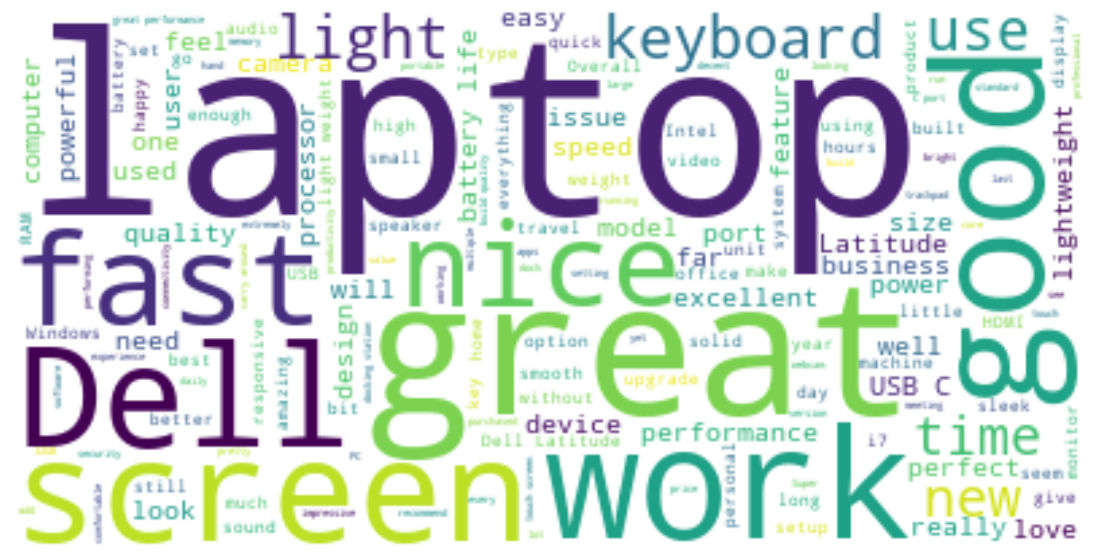

In [20]:
# Assuming data_knn is your DataFrame with sentiment and reviewBody columns
pos = data.loc[data_knn.sentiment == "Positive"].reviewBody
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)


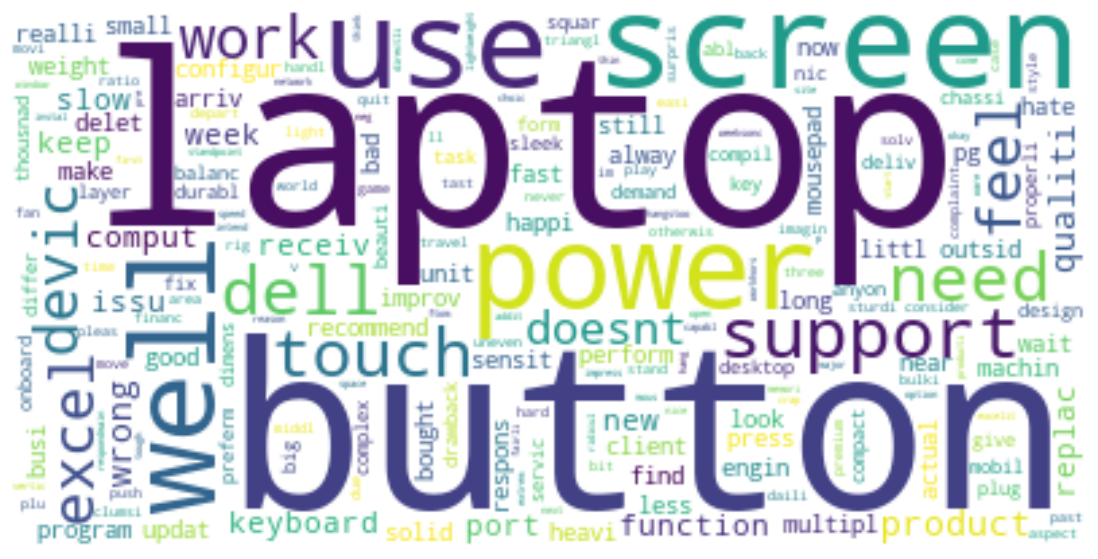

In [21]:
pos = data_knn.loc[data_knn.sentiment=="Negative"].reviewBody
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

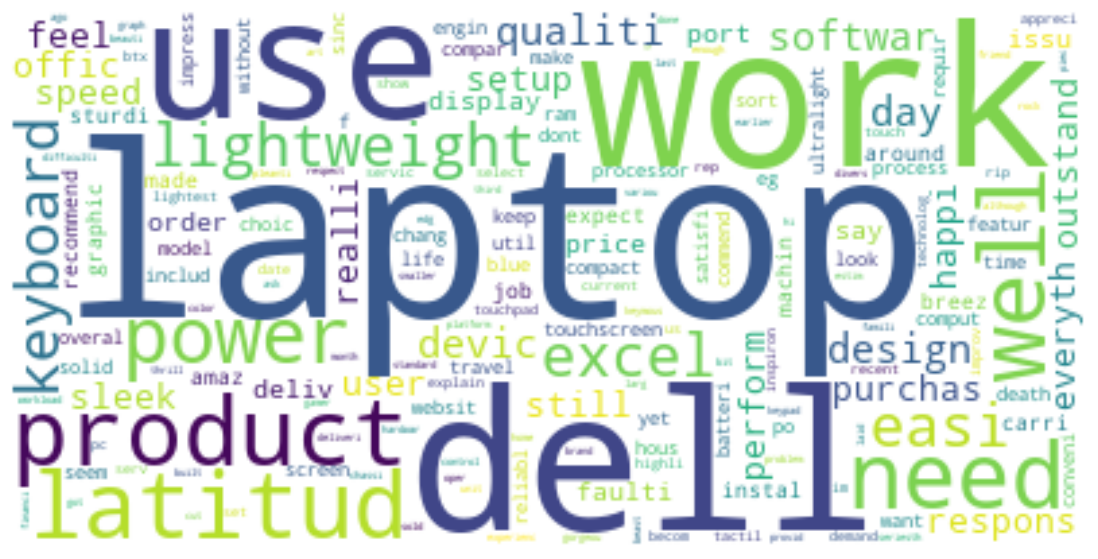

In [22]:
pos = data_knn.loc[data_knn.sentiment=="Neutral"].reviewBody
text = " ".join(review for review in pos.astype(str))
 
generate_wcloud(text)

In [23]:
!pip install textblob

In [24]:
data_knn.head()

,headline,reviewBody,ratingValue,sentiment_score,sentiment,word_count
0,Super light and efficient laptop,super light effici laptop crisp clean screen e...,5.0,0.310000,Positive,13
1,NEW laptop is great,far love new look feel new laptop,5.0,0.218182,Positive,7
2,Lightweight powerhouse.,great build qualiti excel screen good port opt...,5.0,0.833333,Positive,23
3,Great Laptop for Work,excel laptop work processor abl handl workload...,5.0,0.250000,Positive,10
4,Practical Solid Laptop,far good like hdmi usbc port instead usbc port...,5.0,0.435000,Positive,26


In [25]:
data_knn.tail()

,headline,reviewBody,ratingValue,sentiment_score,sentiment,word_count
301,Dead on arrival,laptop dead arriv still wait replac,1.00000,-0.2,Negative,6
302,Bad Quality,bad qualiti overh keyboardtrackpad issu,1.00000,-0.7,Negative,5
303,Hassles with installation of Win 11,laptop not come requir secur softwar requir co...,1.00000,0.0,Neutral,8
304,Broken Device,laptop broken custom support not help,1.00000,-0.4,Negative,6
319,Dell Latitude 7440 Ultralight Review: A solid ...,dell latitud ultralight impress sleek design p...,4.35082,0.0,Neutral,29


In [26]:
# data_knn.to_csv('/Users/lipikas/Downloads/project_data.csv' , index= False)

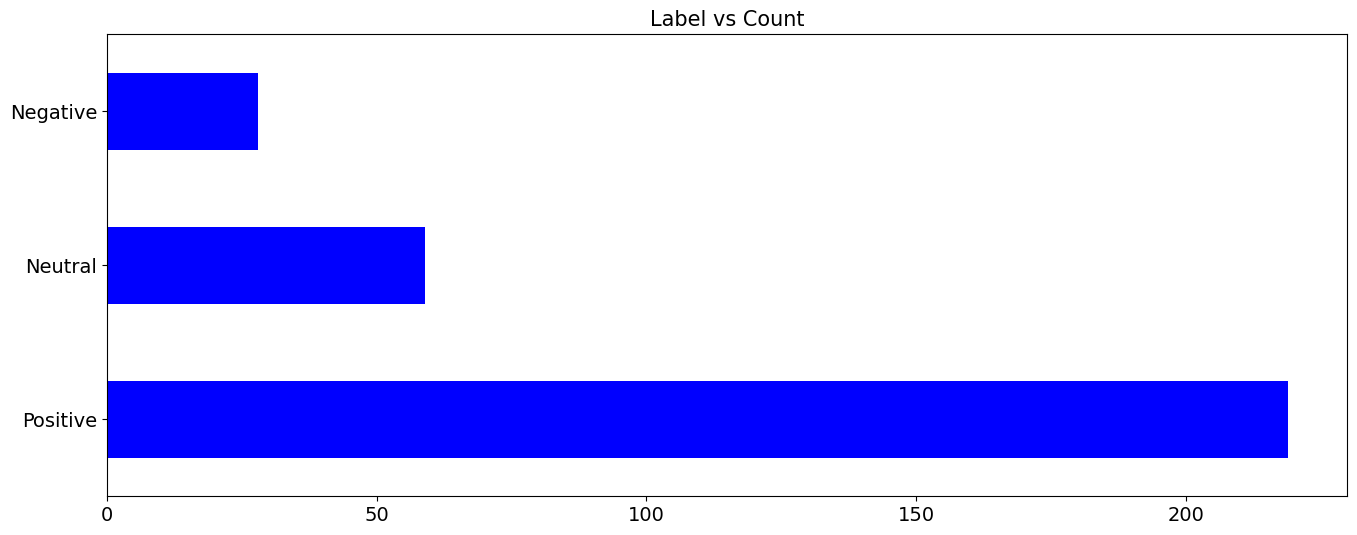

In [27]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = data_knn['sentiment'].value_counts()

vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [56]:
data_knn['sentiment'].value_counts()

Positive    219
Neutral      59
Negative     28
Name: sentiment, dtype: int64

# Step-by-Step Approach:

	1.	Prepare Data:
	•	Ensure your data_knn DataFrame has reviewBody (text data) and ratingValue (target variable) columns.
	•	Clean and preprocess the text data (already discussed in earlier messages).
	2.	Feature Extraction:
	•	Convert text data into numerical features suitable for machine learning algorithms.
	•	Use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or CountVectorizer to transform text into numerical representations.
	3.	Split Data:
	•	Split your dataset into training and testing sets. This helps in evaluating the model’s performance on unseen data.
	4.	Choose a Model:
	•	Select a suitable classification model. Common choices for sentiment analysis include Logistic Regression, Naive Bayes, Support Vector Machines (SVM), or ensemble methods like Random Forests.
	5.	Build a Pipeline:
	•	Construct a pipeline that includes:
	•	Text preprocessing (tokenization, stop words removal, etc.).
	•	Feature extraction (TF-IDF or CountVectorizer).
	•	Model fitting (e.g., Logistic Regression).
	6.	Train the Model:
	•	Fit the pipeline on the training data to train the model.
	7.	Evaluate the Model:
	•	Assess the model’s performance using metrics such as accuracy, precision, recall, and F1-score.
	•	Optionally, visualize the results using a confusion matrix.


In [57]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_knn['reviewBody'], data_knn['ratingValue'], test_size=0.2, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((244,), (62,), (244,), (62,))

### Feature Extraction 
##### Convert text data

In [58]:
# Separate features (X) and target (y)
# X = data_knn['reviewBody']
# print(X)
# y = data_knn['sentiment']
# print(y)

# Initialize CountVectorizern
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer
# Fit to the data and transform
X_bow = bow_vectorizer.fit_transform(X)
X_bow
# # Now X_bow is the Bag-of-Words representation of your text data
# print("Shape of X_bow:", X_bow.shape)

<306x1339 sparse matrix of type '<class 'numpy.int64'>'
	with 5111 stored elements in Compressed Sparse Row format>

In [82]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
print(X_train_tfidf)
X_test_tfidf = vectorizer.transform(X_test).toarray()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [74]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7419354838709677
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.00      0.00      0.00        12
    Positive       0.74      1.00      0.85        46

    accuracy                           0.74        62
   macro avg       0.25      0.33      0.28        62
weighted avg       0.55      0.74      0.63        62



C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
# # Handle imbalanced dataset using SMOTE
# smote = SMOTE(random_state=42)
# X_train_tfidf_res, y_train_res = smote.fit_resample(X_train_tfidf, y_train)

# # Train the Multinomial Naive Bayes model with hyperparameter tuning
# param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
# grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
# grid_search.fit(X_train_tfidf_res, y_train_res)

# # Best model
# model = grid_search.best_estimator_

# # Predict on the test set
# X_test_tfidf_dense = X_test_tfidf.toarray()  # Convert test data to dense
# y_pred = model.predict(X_test_tfidf_dense)

In [79]:
# Define individual models
nb_model = MultinomialNB(alpha=0.01)
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(probability=True)

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[
    ('nb', nb_model),
    ('lr', lr_model),
    ('svm', svm_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = ensemble_model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7580645161290323
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       1.00      0.08      0.15        12
    Positive       0.75      1.00      0.86        46

    accuracy                           0.76        62
   macro avg       0.58      0.36      0.34        62
weighted avg       0.75      0.76      0.67        62



C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PRJAWAL\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# # Reduce dimensionality for outlier detection
# svd = TruncatedSVD(n_components=50, random_state=42)
# X_train_svd = svd.fit_transform(X_train_tfidf).toarray()
# X_test_svd = svd.transform(X_test_tfidf)

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_svd)
# X_test_scaled = scaler.transform(X_test_svd)

# # Detect outliers using Local Outlier Factor (LOF)
# lof = LocalOutlierFactor(n_neighbors=20)
# y_pred_outliers = lof.fit_predict(X_train_scaled)

# # Remove outliers (instances with label -1)
# X_train_filtered = X_train_tfidf[y_pred_outliers == 1]
# y_train_filtered = y_train[y_pred_outliers == 1]


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [54]:
# # Handle imbalanced dataset using SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train_filtered, y_train_filtered)

# # Define individual models
# nb_model = MultinomialNB(alpha=0.01)
# lr_model = LogisticRegression(max_iter=1000)
# svm_model = SVC(probability=True)

# # Create an ensemble of models
# ensemble_model = VotingClassifier(estimators=[
#     ('nb', nb_model),
#     ('lr', lr_model),
#     ('svm', svm_model)
# ], voting='soft')

# # Train the ensemble model
# ensemble_model.fit(X_train_res, y_train_res)

# # Predict on the test set
# y_pred = ensemble_model.predict(X_test_tfidf)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

NameError: name 'X_train_filtered' is not defined

In [80]:
with open("transformer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
    
with open("model.pkl", "wb") as f:
    pickle.dump(ensemble_model, f)

In [83]:
# Function to load the model and vectorizer
def load_model_and_vectorizer():
    with open("transformer.pkl", "rb") as f:
        vectorizer = pickle.load(f)
    with open("model.pkl", "rb") as f:
        ensemble_model = pickle.load(f)
    return vectorizer, ensemble_model

# Function to get sentiment
def get_sentiment(reviewbody):
    vectorizer, ensemble_model = load_model_and_vectorizer()
    x = vectorizer.transform([reviewbody]).toarray()
    # Predicting sentiment
    y = ensemble_model.predict(x)
    return y[0]  # Return the first (and only) prediction

# Test the function with a positive review
review = "This laptop is fast and lightwieght"
print(f"This is a {get_sentiment(review)} sentiment!")

This is a Positive sentiment!


In [84]:
# Test the function with a positive review
review = "This laptop is slow and have issues"
print(f"This is a {get_sentiment(review)} sentiment!")

This is a Negative sentiment!


In [87]:
# Test the function with a positive review
review = input('Enter')
print(f"This is a {get_sentiment(review)} sentiment!")

Enter this is bad 


This is a Negative sentiment!


In [ ]:
import streamlit as st
import pickle

# Function to load the model and vectorizer
def load_model_and_vectorizer():
    with open("./model/vector.pkl", "rb") as f:
        vectorizer = pickle.load(f)
    with open("./model/Logistic.pkl", "rb") as f:
        ensemble_model = pickle.load(f)
    return vectorizer, ensemble_model

# Function to get sentiment
def get_sentiment(Review):
    vectorizer, ensemble_model = load_model_and_vectorizer()
    x = vectorizer.transform([Review])
    # Predicting sentiment
    y = ensemble_model.predict(x)
    return y[0]  # Return the first (and only) prediction

# Streamlit app
st.title("Sentiment Analysis App")

user_input = st.text_area("Enter text to analyze sentiment")

if st.button("Analyze"):
    sentiment = get_sentiment(user_input)
    st.write(f"This is a {sentiment} sentiment!")
